## Libraries

In [2]:
import re
import smopy
import warnings
import numpy as np
#import seaborn as sns
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource, LinearSegmentedColormap
from matplotlib import cbook
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS

#plt.style.use('seaborn')
warnings.filterwarnings('ignore')

## Load data

In [124]:
df = pd.read_csv('./input/df_pre_train.csv')

TEXT_COLS = ['name', 'description', 'space', 'house_rules', 'access', 'interaction', 'neighborhood_overview', 'notes', 'transit']

cities = ['Paris', 'Madrid', 'London', 'Rome', 'Prague', 'Berlin', 'Athens']

## Text length

In [5]:
def clean_string(string):
    '''Removes unnecessary characters from string'''
    if pd.isna(string):
        return ''
    string = str(string).lower()
    string = re.sub("&", "and", string)
    string = re.sub(r"\\", " ", string)
    string = re.sub("/", " ", string)
    string = re.sub("what's", "what is", string)
    string = re.sub("it\'s", "it is", string)
    string = re.sub("\'ve", " have", string)
    string = re.sub("can\'t", "cannot", string)
    string = re.sub("n\'t", " not", string)
    string = re.sub("i\'m", "i am", string)
    string = re.sub("\'re", " are", string)
    string = re.sub("\'d", " would", string)
    string = re.sub("\'ll", " will", string)
    string = re.sub("he\'s", "he is", string)
    string = re.sub("she\'s", "she is", string)
    string = re.sub("that\'s", "that is", string)
    string = re.sub("what\'s", "what is", string)
    string = re.sub("where\'s", "where is", string)
    string = re.sub("how\'s", "how is", string)
    string = re.sub("who\'s", "who is", string)
    string = re.sub("won\'t", "will not", string)
    string = re.sub("n\'t", " not", string)
    string = re.sub("n\'", "ng", string)
    string = re.sub("\'bout", "about", string)
    string = re.sub("\'til", "until", string)
    string = re.sub("[^A-Za-z\s]", "", string)
    return string

def get_text_length(text):
    if pd.isna(text):
        return np.nan
    text = clean_string(str(text))
    length = len(text.split(' '))
    length = int(length)
    return length

def get_multicol_text_length(df, cols):
    for i, row in df.iterrows():
        length = 0
        for col in cols:
            length += get_text_length(df.loc[i, col])
        df.loc[i, 'all_length'] = length

In [4]:
df['desc_length'] = df['description'].apply(get_text_length)

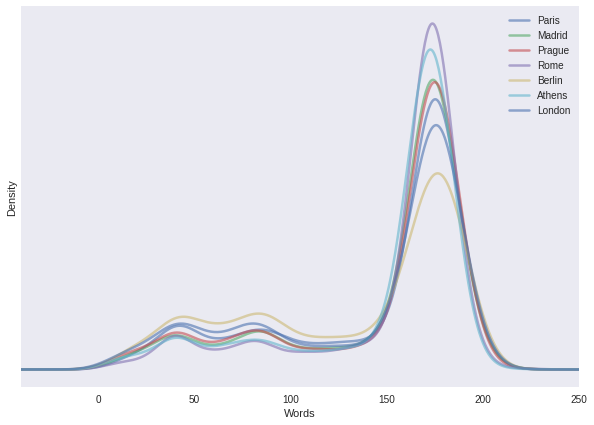

In [5]:
fig = plt.figure(figsize = (10, 7))
for i, city in zip(range(len(cities)), cities):
    df.loc[df[f'city_{city}'] == 1, 'desc_length'].plot(kind = 'density', alpha = 0.6, lw = 2.5)
plt.xlim([-40, 250])
plt.yticks([])
plt.ylabel('Density')
plt.xlabel('Words')
plt.legend(cities, frameon = False)
plt.grid()
#plt.title("Description length in words by city", size = 'xx-large', y = 1.01)
plt.savefig('./output/desc_length.pdf')
plt.show();

## Price

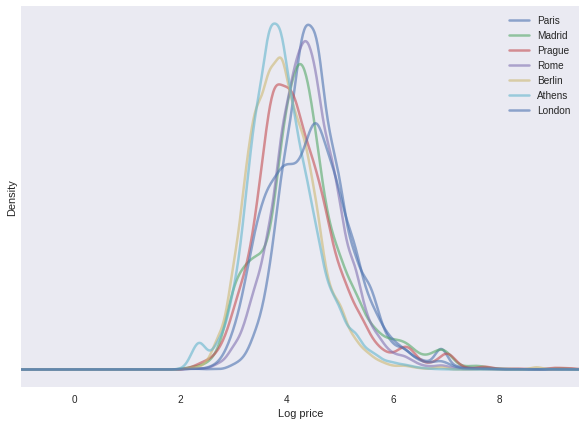

In [6]:
fig = plt.figure(figsize = (10, 7))
for city in cities:
    df.loc[df[f'city_{city}'] == 1, 'log_price'].plot(kind = 'density', alpha = 0.6, lw = 2.5)
plt.xlim([-1, 9.5])
plt.yticks([])
plt.ylabel('Density')
plt.xlabel('Log price')
#plt.title("Log price by city", size = 'xx-large', y = 1.01)
plt.legend(cities, frameon = False)
plt.grid()
plt.savefig('./output/log_price.pdf')
plt.show();

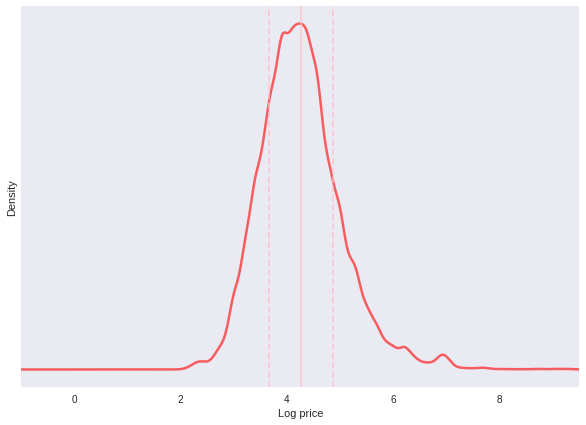

In [7]:
fig = plt.figure(figsize = (10, 7))
df['log_price'].plot(kind = 'density', alpha = 0.6, lw = 2.5, color = 'red')
plt.axvline(np.mean(df['log_price']), color = 'pink', alpha = 0.75)
plt.axvline(np.mean(df['log_price']) - np.var(df['log_price']), linestyle = '--', color = 'pink', alpha = 0.75)
plt.axvline(np.mean(df['log_price']) + np.var(df['log_price']), linestyle = '--', color = 'pink', alpha = 0.75)
plt.ylabel('Density')
plt.xlabel('Log price')
plt.xlim([-1, 9.5])
plt.yticks([])
plt.grid()
#plt.title("Log price", size = 'xx-large', y = 1.01)
plt.savefig('./output/log_price_tot.pdf')
plt.show();

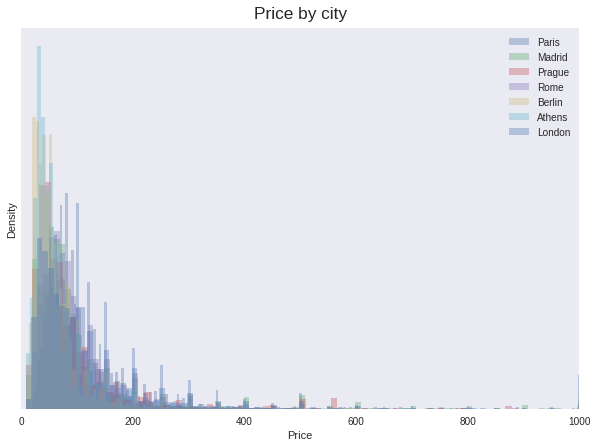

In [8]:
fig = plt.figure(figsize = (10, 7))

for city in cities:
    df.loc[df[f'city_{city}'] == 1, 'price'].plot(kind = 'hist', alpha = 0.35, density = True, bins = 1_000)
plt.xlim([0, 1_000])
plt.yticks([])
plt.ylabel('Density')
plt.xlabel('Price')
plt.title("Price by city", size = 'xx-large', y = 1.01)
plt.legend(cities, frameon = False)
plt.grid()
plt.show();

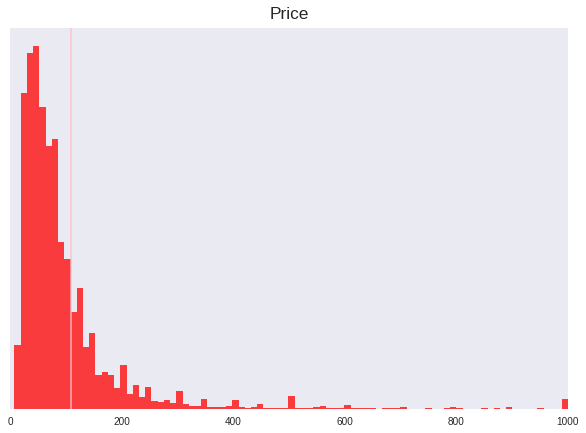

In [9]:
fig = plt.figure(figsize = (10, 7))

df['price'].plot(kind = 'hist', density = True, alpha = 0.75, color = 'red', bins = 1_000)
plt.axvline(np.mean(df['price']), color = 'pink', alpha = 0.75)
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.xlim([0, 1_000])
plt.grid()
#plt.title("Price", size = 'xx-large', y = 1.01)
plt.show();

## Wordcloud

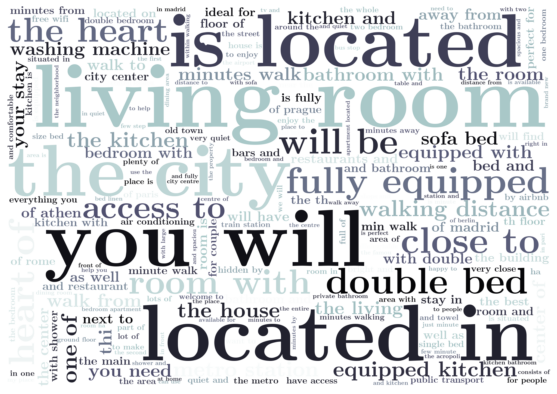

In [27]:
fig = plt.figure(figsize = (10, 7))
text = " ".join(clean_string(desc) for desc in df['description'])
stopwords = set(STOPWORDS)
stopwords.update(['apartment', 'flat'])
model = WordCloud(
    font_path = './input/cmunbx.ttf',
    stopwords = stopwords,
    width = 2_000,
    height = 1_400,
    background_color = 'white',
    colormap = 'bone'
)
cloud = model.generate(text)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis("off")
plt.savefig('./output/wordcloud.pdf')
plt.show()

## Feature distributions

In [2]:
binary_cols = [
    'is_location_exact', 'host_is_superhost', 'host_multihost', 'host_identity_verified',
    'host_is_superhost', 'property_type_Apartment', 'requires_license', 'instant_bookable',
    'host_verif_reviews', 'host_verif_government_id', 'host_verif_jumio',
    'host_verif_offline_government_id', 'host_verif_selfie', 'host_verif_identity_manual',
    'host_verif_facebook', 'host_verif_work_email', 'amenity_Washer', 'amenity_Hot_water',
    'amenity_TV', 'amenity_Elevator', 'amenity_Smoke_detector', 'amenity_Breakfast',
    'amenity_Familykid_friendly', 'amenity_Refrigerator', 'amenity_Air_conditioning',
    'amenity_Dishwasher', 'amenity_Free_street_parking', 'amenity_Pets_allowed',
    'amenity_Smoking_allowed', 'amenity_Self_checkin'
]

num_cols = [
    'host_response_rate', 'num_host_verifications','dist_to_centre','accommodates',
    'bedrooms', 'bathrooms', 'beds', 'num_amenities', 'guests_included', 'minimum_nights',
    'maximum_nights', 'availability_30', 'availability_365', 'availability_60',
    'availability_90', 'number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value',
    'as_host_months', 'days_since_last_review', 'months_since_first_review', 'host_listings_count'
]

categorical_cols = [
    'host_response_time', 'room_type', 'cancellation_policy'
]


location_cols = [
    'latitude', 'longitude'
]

categorical_dict = {
    'room_type': {
        'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2
    },
    'host_response_time': {
        'within an hour': 0, 'within a few hours': 1,
        'within a day': 2, 'a few days or more': 3
    },
    'cancellation_policy': {
        'flexible': 0, 'moderate': 1, 'strict': 2, 'super strict': 3
    }   
}

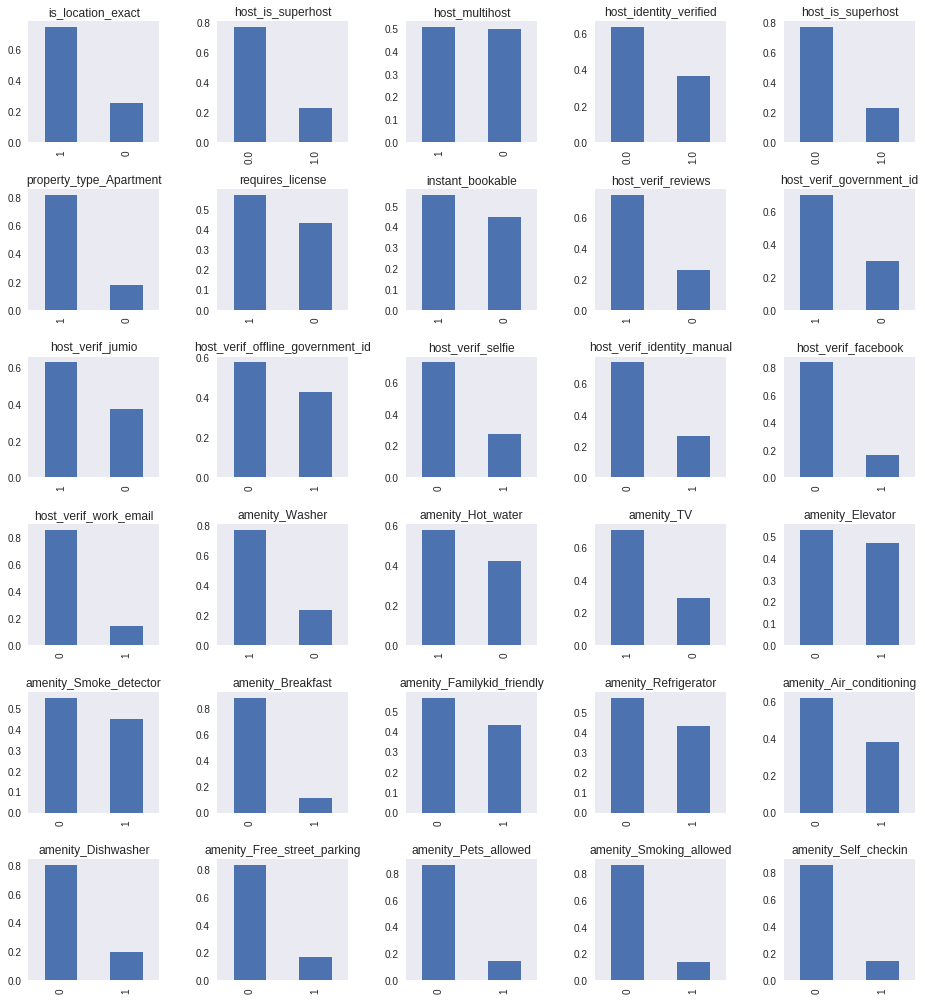

In [36]:
plt.figure(figsize = (13, 14))
for i, col in zip(range(len(binary_cols)), binary_cols):
    plt.subplot(6, 5, i+1)
    props = df[col].value_counts() / len(df)
    props.plot(kind = "bar")
    plt.grid()
    plt.title(f'{col}')
plt.tight_layout()
plt.savefig('./output/binary_cols.pdf')
plt.show()

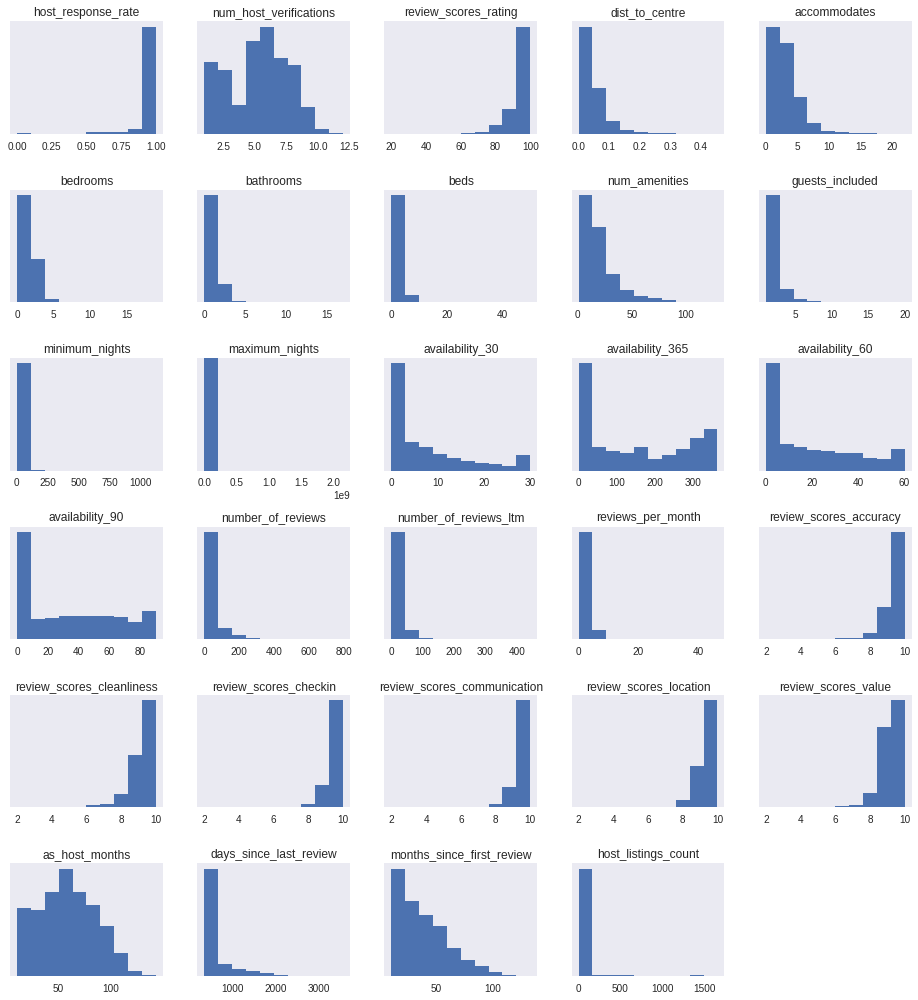

In [38]:
plt.figure(figsize = (13, 14))
for i, col in zip(range(len(num_cols)), num_cols):
    plt.subplot(6, 5, i+1)
    df[col].plot(kind = "hist", density = True)
    plt.ylabel('')
    plt.yticks([])
    plt.grid()
    plt.title(f'{col}')
plt.tight_layout()
plt.savefig('./output/numeric_cols.pdf')
plt.show()

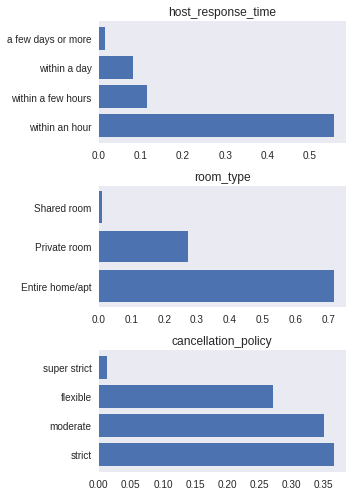

In [40]:
plt.figure(figsize = (5, 7))
for i, col in zip(range(len(categorical_cols)), categorical_cols):
    plt.subplot(3, 1, i+1)
    label_dict = {val: key for key, val in categorical_dict[col].items()}
    x_labels = [label_dict[i] for i in df[col].value_counts().index]
    plt.barh(x_labels, df[col].value_counts() / len(df))
    plt.grid()
    plt.title(f'{col}')
plt.tight_layout()
plt.savefig('./output/nominal_cols.pdf')
plt.show()

## Correlations

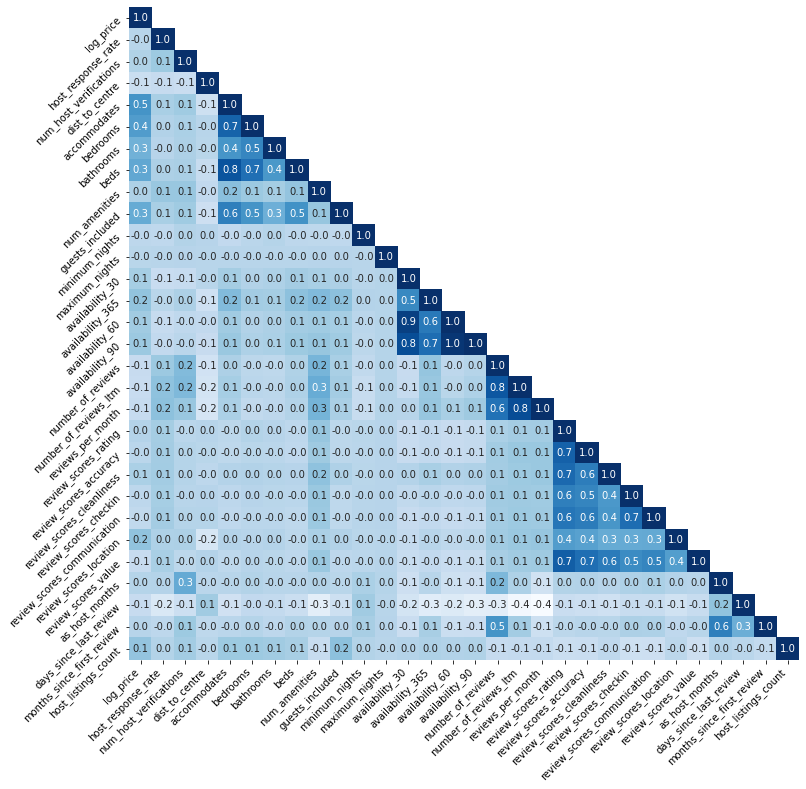

In [38]:
corr = df[['log_price'] + num_cols].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k = 1)] = True
plt.figure(figsize = (12, 12))
sns.heatmap(corr, cmap = "Blues", annot = True, fmt = '.1f', cbar = False, mask = mask)
plt.yticks(rotation=45) 
plt.xticks(rotation=45, ha='right') 
plt.savefig('./output/correlations.pdf', bbox_inches = 'tight')
plt.show();

## Geography

In [143]:
coords = {
    'Paris': ((48.83, 48.91), (2.25, 2.42)),
    'Madrid': ((40.395, 40.44), (-3.73, -3.67)),
    'London': ((51.42, 51.60), (-0.2900, 0.010)),
    'Prague': ((50.06, 50.11), (14.38, 14.48)),
    'Rome': ((41.8450, 41.9350), (12.4100, 12.5575)),
    'Berlin': ((52.45, 52.58), (13.3, 13.51)),
    'Athens': ((37.9635, 38.01), (23.68, 23.78))
}

limits = {
    'Paris': ((150, 650), (12, 512)),
    'London': ((75, 575), (0, 500)),
    'Athens': ((250, 800), (100, 650))  
}

def crop_points(df, city, map_obj, limits):
    '''Filter out projected coordinates outside map limits '''
    x_min, x_max, y_min, y_max = 0, map_obj.w-1, 0, map_obj.h-1
    if city in offsets:
        x_min = limits[city][0][0]
        x_max = limits[city][0][1]
        y_min = limits[city][1][0]
        y_max = limits[city][1][1]
    # Minimums
    df = df.loc[df['x'] > x_min+1, :]
    df = df.loc[df['y'] > y_min+1, :]
    # Maximums
    df = df.loc[df['x'] < x_max-1, :]
    df = df.loc[df['y'] < y_max-1, :]
    return df
    
def offset_points(df, city, limits):
    '''Offset points as result of map cropping'''
    if city in offsets:
        df['x'] -= limits[city][0][0]
        df['y'] -= limits[city][1][0]
    return df

def plot_points(df):
    '''Plot points as a scatter plot'''
    plt.scatter(
        df['x'], df['y'],
        zorder = 1,
        alpha = 0.3,
        c = df['log_price'],
        s = 6,
        linewidths = 0,
        edgecolors = 'none',
        cmap = 'inferno'
    )
    
def plot_map(city, offsets):
    '''Plot cropped map under scatter plot'''
    map_img = plt.imread(f'./input/{city}.png')
    if city in offsets:
        x_min, x_max = offsets[city][0][0], offsets[city][0][1]
        y_min, y_max = offsets[city][1][0], offsets[city][1][1]
        map_img = map_img[y_min:y_max, x_min:x_max]
    map_img = map_img[:, :, 0]
    plt.imshow(map_img, zorder = 0, aspect = 'equal', cmap = 'bone')
    plt.title(f'{city}', size = 'x-large')
    #plt.grid()
    plt.yticks([])
    plt.xticks([])
    plt.ylabel('')
    plt.xlabel('')    

Lowered zoom level to keep map size reasonable. (z = 12)
Lowered zoom level to keep map size reasonable. (z = 13)
Lowered zoom level to keep map size reasonable. (z = 11)
Lowered zoom level to keep map size reasonable. (z = 12)
Lowered zoom level to keep map size reasonable. (z = 13)
Lowered zoom level to keep map size reasonable. (z = 12)
Lowered zoom level to keep map size reasonable. (z = 13)


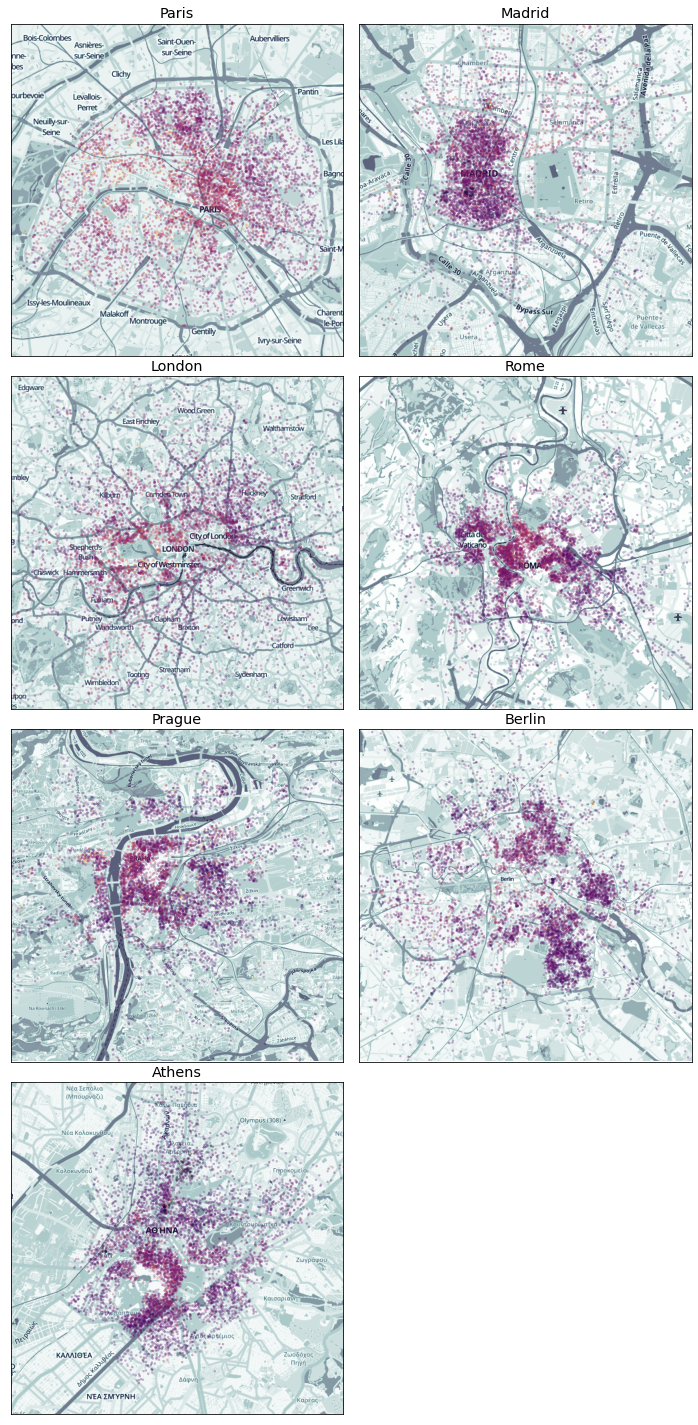

In [145]:
plt.figure(figsize = (9.8, 19.6))
for i, city in zip(range(7), cities):
    plt.subplot(4, 2, i+1)
    # Fetch coordinate limits
    lat_min, lat_max = coords[city][0][0], coords[city][0][1], 
    long_min, long_max = coords[city][1][0], coords[city][1][1]
    # Fetch map
    map_obj = smopy.Map(lat_min, long_min, lat_max, long_max, z = 19, tileserver = 'http://a.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png')
    map_obj.save_png(f'./input/{city}.png')
    # Subset city from dataframe
    df_city = df.loc[df[f'city_{city}'] == 1, ['latitude', 'longitude', 'log_price']]
    # Project coordinates to map
    df_city['x'], df_city['y'] = map_obj.to_pixels(df_city['latitude'], df_city['longitude'])
    # Plot map
    plot_map(city, limits)
    # Plot points
    df_city = crop_points(df_city, city, map_obj, limits)
    df_city = offset_points(df_city, city, limits)
    plot_points(df_city)
plt.tight_layout(pad = 0, h_pad = 0, w_pad = 0)
plt.savefig('./output/maps_grey.pdf')
plt.show()

## Fictional least-squares hyperplane

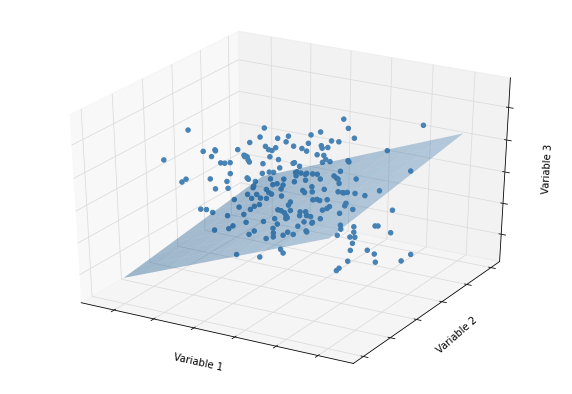

In [123]:
def CustomCmap(from_rgb,to_rgb):
    r1, g1, b1 = from_rgb
    r2, g2, b2 = to_rgb
    cdict = {
        'red': ((0, r1, r1), (1, r2, r2)),
        'green': ((0, g1, g1), (1, g2, g2)),
        'blue': ((0, b1, b1),(1, b2, b2))
    }
    cmap = LinearSegmentedColormap('custom_cmap', cdict)
    return cmap

my_cmap = CustomCmap([0/255, 51/255, 102/255], [51/255, 102/255, 153/255])

plt.rcParams['grid.color'] = "gainsboro"

x = np.linspace(0,1,10)
y = np.linspace(0,1,10)
X,Y = np.meshgrid(x,y)
Z = 0.12861723162963065 * X + 0.034024845304814665 * Y + 0.9964608113924048


x = np.random.normal(0.5, 0.25, size = 200)
y = np.random.normal(0.5, 0.1, size = 200)
z = np.random.normal(1.10, 0.05, size = 200)

fig = plt.figure(figsize = (10, 7))
ax = fig.gca(projection = '3d')

ls = LightSource(270, 45)
rgb = ls.shade(Z, cmap = my_cmap, vert_exag = 0.1, blend_mode = 'soft')

ax.scatter(x, y, z, color = 'steelblue', alpha = 1)
ax.plot_surface(
    X, Y, Z,
    facecolors = rgb,
    alpha = 0.35,
    linewidth = 0,
    antialiased = True,
    shade = False
)
ax.yaxis.set_rotate_label(False)
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2', rotation = 41)
ax.set_zlabel('Variable 3', rotation = 88)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(0)
for t in ax.xaxis.get_major_ticks(): t.label.set_color('white')
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(0)
for t in ax.yaxis.get_major_ticks(): t.label.set_color('white')
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(0)
for t in ax.zaxis.get_major_ticks(): t.label.set_color('white')
plt.savefig('./output/ols.pdf')
plt.show();

## Fictional loss surface

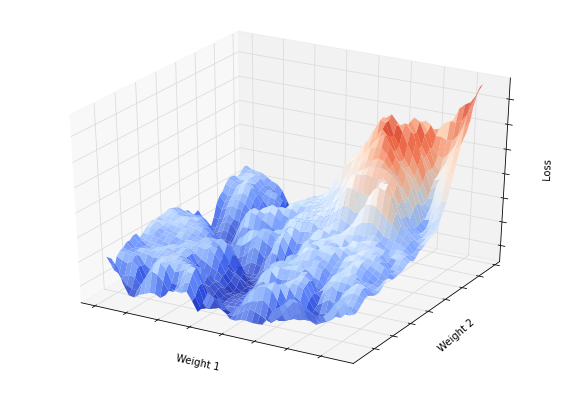

In [6]:
plt.rcParams['grid.color'] = "gainsboro"

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj = False)
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)
region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw = dict(projection = '3d'), figsize = (10, 7))

ls = LightSource(270, 45)
rgb = ls.shade(z, cmap = cm.coolwarm, vert_exag = 0.1, blend_mode = 'soft')

surf = ax.plot_surface(
    x, y, z,
    rstride = 1,
    cstride = 1,
    facecolors = rgb,
    linewidth = 0,
    antialiased = True,
    shade = False
)
ax.yaxis.set_rotate_label(False)
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2', rotation = 41)
ax.set_zlabel('Loss', rotation = 88)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(0)
for t in ax.xaxis.get_major_ticks(): t.label.set_color('white')
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(0)
for t in ax.yaxis.get_major_ticks(): t.label.set_color('white')
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(0)
for t in ax.zaxis.get_major_ticks(): t.label.set_color('white')
plt.savefig('./output/optim.pdf')
plt.show();